In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [33]:
data = pd.read_csv(r"/Users/loganmorales/Desktop/Comodo_Seckin/netflow_day-02.csv",sep=",",index_col=False, nrows=1000)

In [34]:
data.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [35]:
X = data[["srcPackets","dstPackets","srcBytes","dstBytes"]]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [37]:
X_normalized.columns = ["srcPackets", "dstPackets", "srcBytes", "dsyBytes"]

In [38]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest()
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [39]:
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [40]:
X['Anomaly_Class'] = Anomaly_Class
X['Anomaly_Score'] = Anomaly_Score

In [41]:
X.head()

,srcPackets,dstPackets,srcBytes,dstBytes,Anomaly_Class,Anomaly_Score
0,0,755065,0,1042329018,-1,-0.033499
1,1665,1108,300810,250408,1,0.186689
2,1866,0,1477041,0,1,0.184098
3,3326,0,2656305,0,1,0.183465
4,5423,0,4388449,0,1,0.179681


In [42]:
# Giving count of anomolies and normal values, -1 is an anomoly
X.groupby('Anomaly_Class')[['Anomaly_Score']].count()

,Anomaly_Score
Anomaly_Class,
-1,101
1,899


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dda48d0>,
      dtype=object)

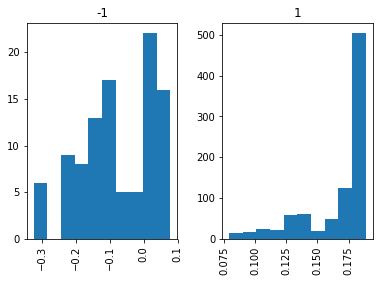

In [43]:
# Lets make a histogram
X['Anomaly_Score'].hist(by=X['Anomaly_Class'])

In [44]:
X['Anomaly_Score'].describe()

count    1000.000000
mean        0.142340
std         0.085189
min        -0.325183
25%         0.136083
50%         0.178494
75%         0.184730
max         0.188732
Name: Anomaly_Score, dtype: float64

In [48]:
# Lets do the same thing, with a different contamination score for the Isolation Forest Algorithm
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.2)
iforest.fit(X_normalized)

IsolationForest(bootstrap=False, contamination=0.2, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [49]:
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [50]:
X['Anomaly_Class_Contamination'] = Anomaly_Class
X['Anomaly_Score_Contamination'] = Anomaly_Score

In [51]:
X.groupby('Anomaly_Class_Contamination')[['Anomaly_Score_Contamination']].count()

,Anomaly_Score_Contamination
Anomaly_Class_Contamination,
-1,200
1,800


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e337fd0>,
      dtype=object)

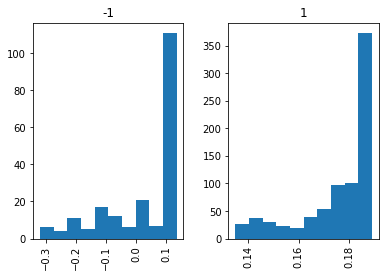

In [52]:
X['Anomaly_Score_Contamination'].hist(by=X['Anomaly_Class_Contamination'])

In [21]:
X['Anomaly_Score_Contamination'].describe()

count    500.000000
mean       0.132952
std        0.088309
min       -0.291284
25%        0.142487
50%        0.161496
75%        0.177204
max        0.181852
Name: Anomaly_Score_Contamination, dtype: float64

In [53]:
# We can see, Anomoly count is different, compared to before contamination

In [54]:
# Lets do it again with Bootstrap set to 'True'.
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(bootstrap=True)
iforest.fit(X_normalized)

IsolationForest(bootstrap=True, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [55]:
Anomaly_Class = iforest.predict(X_normalized)
Anomaly_Score = iforest.decision_function(X_normalized)

In [56]:
X['Anomaly_Class_Bootstrap'] = Anomaly_Class
X['Anomaly_Score_Bootstrap'] = Anomaly_Score

In [57]:
X.groupby('Anomaly_Class_Bootstrap')[['Anomaly_Score_Bootstrap']].count()

,Anomaly_Score_Bootstrap
Anomaly_Class_Bootstrap,
-1,102
1,898


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e355a90>,
      dtype=object)

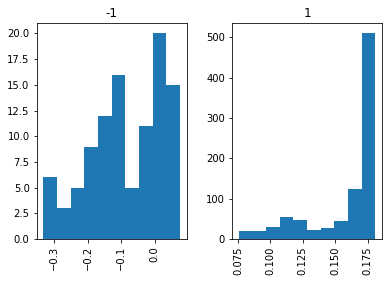

In [58]:
X['Anomaly_Score_Bootstrap'].hist(by=X['Anomaly_Class_Bootstrap'])

In [59]:
# New data set with anomaly variables
X.head()

,srcPackets,dstPackets,srcBytes,dstBytes,Anomaly_Class,Anomaly_Score,Anomaly_Class_Contamination,Anomaly_Score_Contamination,Anomaly_Class_Bootstrap,Anomaly_Score_Bootstrap
0,0,755065,0,1042329018,-1,-0.033499,-1,-0.035578,-1,-0.036652
1,1665,1108,300810,250408,1,0.186689,1,0.187954,1,0.179277
2,1866,0,1477041,0,1,0.184098,1,0.186190,1,0.176682
3,3326,0,2656305,0,1,0.183465,1,0.186283,1,0.176678
4,5423,0,4388449,0,1,0.179681,1,0.181279,1,0.171278


In [60]:
# Top records
X[['Anomaly_Score_Contamination','Anomaly_Score_Bootstrap','Anomaly_Score']].head().sort_values(['Anomaly_Score_Contamination'], ascending=[1])

,Anomaly_Score_Contamination,Anomaly_Score_Bootstrap,Anomaly_Score
0,-0.035578,-0.036652,-0.033499
4,0.181279,0.171278,0.179681
2,0.186190,0.176682,0.184098
3,0.186283,0.176678,0.183465
1,0.187954,0.179277,0.186689
